Zadanie 2 niejawna metoda rożnic skończonych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def implicit_heat_equation(n=20, M=50, k=0.05):

    #uxx = ut, u(x,0) = (x-x^2)*e^x, u(0,t) = u(1,t) = 0

    #dyskretyzacja przestrzeni
    h = 1/n
    x = np.linspace(0, 1, n+1)
    t = np.linspace(0, M*k, M+1)

    #maciez m+1 wierszy, n+1 kolumn
    u = np.zeros((M+1, n+1))


    u[0, :] = (x-x**2)*np.exp(x) #warunek poczatkowy u(x,0)=(x-x^2)*e^x
    #warunki brzegowe
    u[:, 0]=0
    u[:, -1]=0  #ostatnia kolumna na 0




    r = k/h**2

    #diagonale
    main_diag = np.ones(n-1)*(1+2*r)
    off_diag = np.ones(n-2)*(-r)

    #macierz
    A = diags([off_diag, main_diag, off_diag], [-1, 0, 1], shape=(n-1, n-1))


    for j in range(M):
        b = u[j, 1:-1]
        u[j+1, 1:-1] = spsolve(A, b)

    return x, t, u

<ipython-input-2-084f58911cf3>:34: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  u[j+1, 1:-1] = spsolve(A, b)


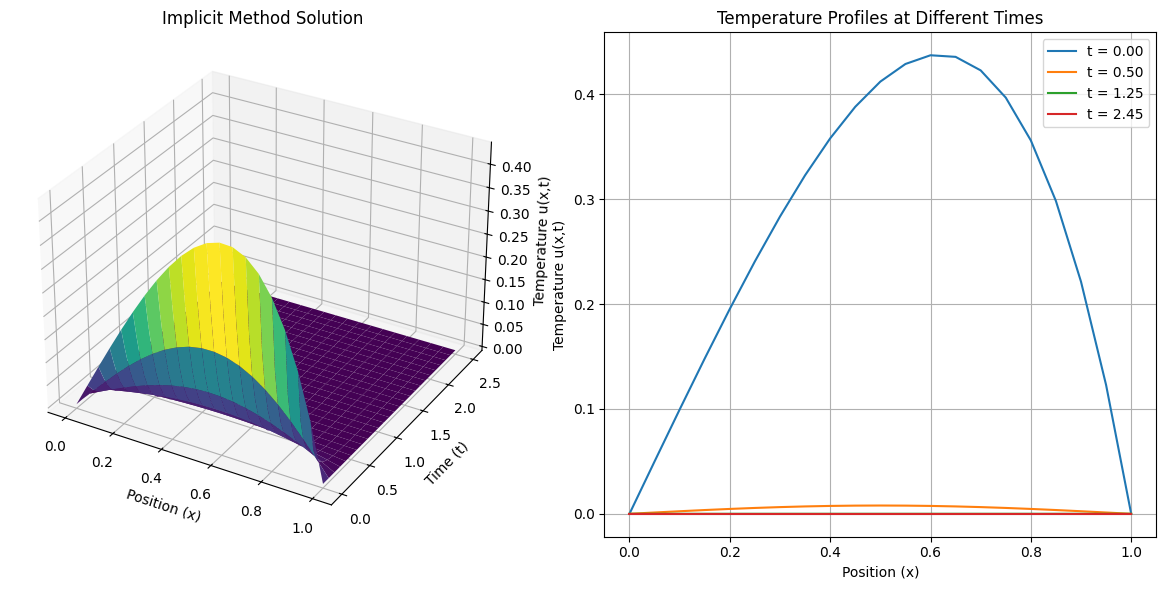

In [3]:
#wykorzystany chat gpt do poprawienia kodu (rzadko korzystałam z wykresów 3D i niestety ale wyskakiwały błędy przy tym kodzie...)
x_implicit, t_implicit, u_implicit = implicit_heat_equation()

X_impl, T_impl = np.meshgrid(x_implicit, t_implicit)

fig = plt.figure(figsize=(12, 6))


ax1 = plt.subplot(121, projection='3d')
surf = ax1.plot_surface(X_impl, T_impl, u_implicit, cmap='viridis')
ax1.set_xlabel('Position (x)')
ax1.set_ylabel('Time (t)')
ax1.set_zlabel('Temperature u(x,t)')
ax1.set_title('Implicit Method Solution')

ax2 = plt.subplot(122)
times_to_plot = [0, 10, 25, 49]
for i in times_to_plot:
    ax2.plot(x_implicit, u_implicit[i], label=f't = {t_implicit[i]:.2f}')
ax2.set_xlabel('Position (x)')
ax2.set_ylabel('Temperature u(x,t)')
ax2.grid(True)
ax2.legend()
ax2.set_title('Temperature Profiles at Different Times')

plt.tight_layout()
plt.show()

Zad 3 Crank Nicolson

In [4]:
def crank_nicolson_method(L=1, tmax=1, nx=20, nt=50, alpha=1, f=None, g=None):

    #uxx - alpha*ut = f(x),  u(x,0) = g(x), u(0,t) = u(L,t) = 0


    dx = L / nx
    dt = tmax / nt
    x = np.linspace(0, L, nx+1)
    t = np.linspace(0, tmax, nt+1)

    u = np.zeros((nt+1, nx+1))

    #warunki poczatkowe, funckja g to warunki poczatkowe - f. sinusoidalna
    if g is None:
        u[0, :] =np.sin(np.pi*x)
    else:
        u[0, :] =g(x)

    #f funckja źródłowa
    if f is None:
        f_vec =np.zeros(nx-1)
    else:
        f_vec =f(x[1:-1])



    #Crank-Nicolson
    r = alpha*dt/(2*dx**2)

    #ustawiam macierz niejawnej czesci
    main_diag_I = np.ones(nx-1)*(1+2*r)
    off_diag_I = np.ones(nx-2)*(-r)
    A = diags([off_diag_I, main_diag_I, off_diag_I], [-1, 0, 1], shape=(nx-1, nx-1))

    #jawna czesc
    main_diag_E =np.ones(nx-1)*(1-2*r)
    off_diag_E =np.ones(nx-2)*r
    B = diags([off_diag_E, main_diag_E, off_diag_E], [-1, 0, 1], shape=(nx-1, nx-1))

    for j in range(nt):
        R = B.dot(u[j, 1:-1])+dt*f_vec/2


        u[j+1, 1:-1]=spsolve(A,R)



    return x, t, u

<ipython-input-4-d3766a4d5fad>:44: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  u[j+1, 1:-1]=spsolve(A,R)


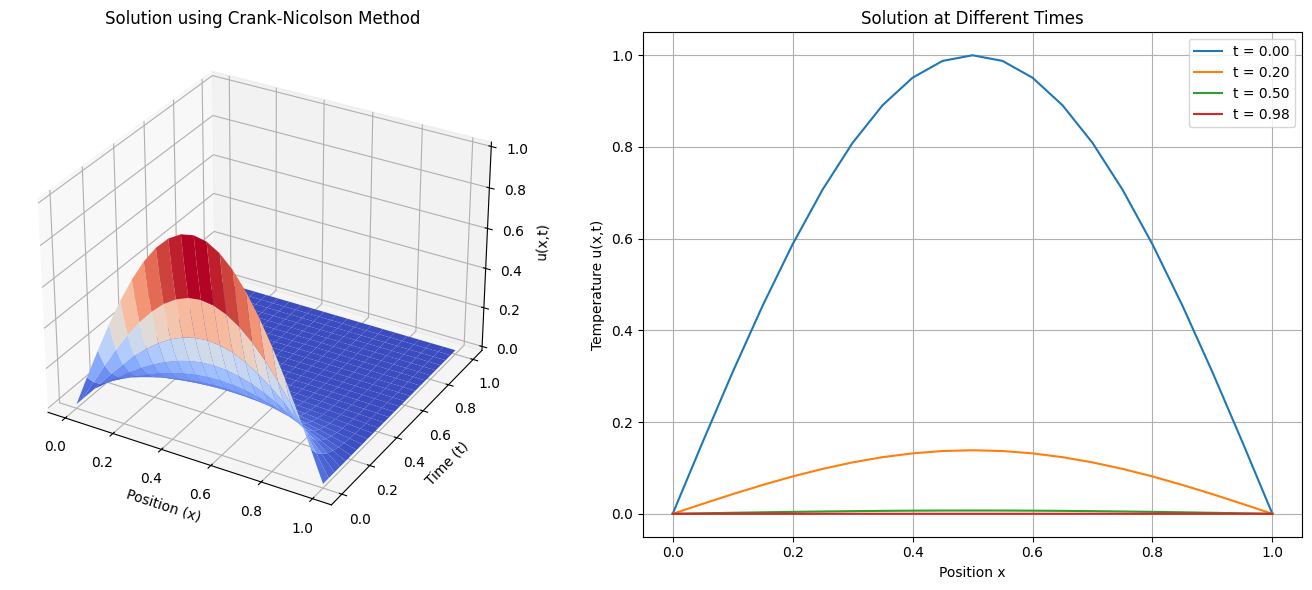

In [5]:
#
def source_term(x):
    return np.zeros_like(x)

#warunek poczatkowy g(x)=sin(pi*x)
def initial_condition(x):
    return np.sin(np.pi*x)


x_cn, t_cn, u_cn = crank_nicolson_method(f=source_term, g=initial_condition)





#chatgpt

# Create meshgrid for visualization
X_cn, T_cn = np.meshgrid(x_cn, t_cn)

# Plotting
plt.figure(figsize=(14, 6))

# 3D view of solution
ax1 = plt.subplot(121, projection='3d')
surf = ax1.plot_surface(X_cn, T_cn, u_cn, cmap='coolwarm')
ax1.set_xlabel('Position (x)')
ax1.set_ylabel('Time (t)')
ax1.set_zlabel('u(x,t)')
ax1.set_title('Solution using Crank-Nicolson Method')

# Solutions at different times
ax2 = plt.subplot(122)
times = [0, 10, 25, 49]  # Selected time points
for i in times:
    ax2.plot(x_cn, u_cn[i], label=f't = {t_cn[i]:.2f}')

ax2.set_xlabel('Position x')
ax2.set_ylabel('Temperature u(x,t)')
ax2.grid(True)
ax2.legend()
ax2.set_title('Solution at Different Times')

plt.tight_layout()
plt.show()